# Doğrusal Regresyon ve Kuzenleri

# Simple Linear Regression

--> Temel amaç, bağımlı ve bağımsız değişken arasındaki ilişkiyi ifade eden doğrusal fonksiyonu bulmaktır.Bu dogrusal fonksiyon nasıl bulunacak?
--> Hata kareler toplamını minimize edecek katsayı tahminlerini bulmaya çalışarak yapılır.

b0(beta 0): sabit katsayıdır.
y=b0+b1*x+e
b0: dogrunun y eksenini kestiği nokta 
b1 : dogrunun eğimi
e : hata terimi

Tahmin modeli: yi=b0+b1*xi

ei(artıklar): yi(gercek deger) - yi sapka(tahmin edilen deger)

SSE = yi(gercek deger) - yi sapka(tahmin edilen deger) nin karelerinin toplamı
b0 = y üssü _ (bağımlı degiskenin ortalaması) - b1* x üssü _ (bagımsız degişkenin ortalaması)

TEORİK GÖSTERİMLER :
---> yi=b0 +b1*xi (tahmin fonksiyonu ve tahmin edilen değerler---> doğruyu temsil eder 
---> yi=b0+b1*xi+ei(gercek y degerleri)---> doğrunun etrafında bulunan noktalar 


### Basit Dogrusal Regresyon - Model


In [1]:
import pandas as pd 
ad=pd.read_csv("Advertising.csv",usecols=[1,2,3,4])# 1.,2.,3. ve 4. columları al demek
df=ad.copy()
df.head()


,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [2]:
# Veri seti indeksi değişken olarak almış o yüzden bunu düzeltmeliyiz
#df=df.iloc[:,1:len(df)]
#df.head()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [5]:
df.isnull().values.any()# veri seti içeirinde ekisk gözlem olup olmadığına baktık


False

In [6]:
# Değişkenlerin birbirlerine etkilerini görmek için
# korelasyona bakılmalı
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [7]:
## Tv harcamaları arttıkça sales artacaktır.
# En anlamlı ve etki düzeyi en fazla olan değişken Tv değişkenidir.

In [8]:
import seaborn as sns
sns.pairplot(df,kind="reg")

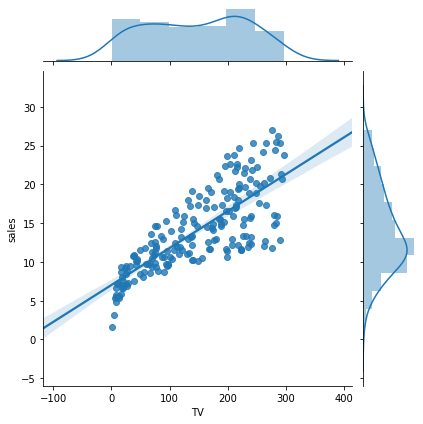

In [9]:
sns.jointplot(x="TV",y="sales",data=df,kind="reg");

In [10]:
# İncelediğimiz veri setinin değişkenlerinin yayılımlarını,
# dağılımlarını,merkezlerinin ne yönde oldugunu bilmek zorundayız.
# Değişkenlerin birbirlerine etki düzeylerini bilmek gerekir.Günün sonunda bazı değişkenler
# dışarda bırakılır
# Bir sürekli değişkenin dağılımının iyi olmasının değerlendirilmesi
# ,o dağılımın tepeli olmaması basık çarpık olmaması gerekir.

### Statsmodels ile modelleme

In [11]:
import statsmodels.api as sm
X= df[["TV"]]# x bagımlı degisken
X[0:5]

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [12]:
# Bir matris işlemi için 1 sabiti eklenmeli
X=sm.add_constant(X)
X[0:5]

C:\Users\aayse\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [13]:
y=df[["sales"]] # bagımlı degisken 
y[0:5]

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


### Model Kurma İşlemi ( model.fit())

In [14]:
lm=sm.OLS(y,X)# Model Kurma islemi
model=lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 24 Apr 2020   Prob (F-statistic):           1.47e-42
Time:                        13:37:52   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

--> R2 : R2 degeri, bagımsız degiskenin bagımlı degiskendeki değişkenliği açıklama
basarısıdır.R2 açıklanablirlik oranıdır.

--> Adj, R - Squared(Düzeltilmiş R2 degeri): r2 degeri formulasyonu itibariyle modele ne kadar degisken eklersek ekleyelim şişmeye meyillidir.R2 nin her parametre eklenmesine karşı kendini törpüleyen ,duyarlılıgı daha az olan bir metriktir.

---> Düzeltilmiş r2 bizim için daha önemlidir.

---> F-statistic: Modelin anlamlılıgın anlaşılması için kurulan test istatistigidir. p-value degerinin kendisidir.

---> b0 degeri sabit degerdir.(coef olarak adlandırılır)
b0 katsayısının sabitin yorumlanması ; tv katsayısı olmadıgında 
zaten b0 katsayısı kadar satıslarda artıs olacaktır.
tv deki bir birimlik artıs 0.0475 oranında satıslarda artıs olacaktır. Her bir degiskenin bagımlı degiskene olan etkilerini görebiliyoruz.

In [15]:
import statsmodels.formula.api as smf
lm = smf.ols("sales ~ TV ", df)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 24 Apr 2020   Prob (F-statistic):           1.47e-42
Time:                        13:37:53   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
# modelin parametrelerine ulasırız
model.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [17]:
# sadece katsayılar ile olan yer gelir.
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [18]:
model.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [19]:
# modelin anlamlılıgına iliskin istatistiklere erişmek isteyelim
model.f_pvalue

1.467389700194647e-42

In [20]:
# pvalue
print("f_pvalue:","%4.f"% model.f_pvalue)

f_pvalue:    0


In [21]:
# fvalue
print("f_value:","%2.f"% model.fvalue)

f_value: 312


In [22]:
# tvalue
print("tvalue:","%2.f"% model.tvalues[0:1]) 

tvalue: 15


In [23]:
# model degerlendirme istatistikleri
model.mse_model

3314.618166868649

In [24]:
#r2 degeri - acıklanabilirlik oranı
model.rsquared

0.611875050850071

In [25]:
# düzeltilmis r2 degeri
model.rsquared_adj

0.6099148238341623

In [26]:
# modelin tahmin ettigi degerlere eriselim
model.fittedvalues[0:5]

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

In [27]:
# gercekteki y degerleri
y[0:5]

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [28]:
# modelin denklemini yazalım
print("Sales="+str("%.2f"%model.params[0]+"+TV"+"*"+str("%.2f"% model.params[1])))

Sales=7.03+TV*0.05


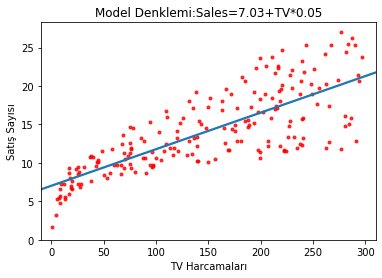

In [29]:
from matplotlib import pyplot as plt
g=sns.regplot(df["TV"],df["sales"],ci=None,scatter_kws={'color':'r','s':9})
g.set_title("Model Denklemi:Sales=7.03+TV*0.05")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
plt.xlim(-10,310)
plt.ylim(bottom=0);

### Scikitlearn ile model kurma

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
X=df[["TV"]]
y= df["sales"]
reg=LinearRegression()
model=reg.fit(X,y)
model.intercept_
model.coef_ # b1 katsayısı

array([0.04753664])

In [32]:
# r2 degeridir
model.score(X,y)

0.611875050850071

In [33]:
# model aracılıgıyla tahmin edilen degerleri predict ile görebiliriz.
model.predict(X)[0:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

### Tahmin

Model denklemi: 
    Sales=7.03+TV*0.04
    
    Örneğin 30 birim TV harcaması oldugunda satışların tahmini değeri ne olur?

In [34]:
7.03+30*0.04

8.23

In [35]:
from sklearn.linear_model import LinearRegression
X= df[["TV"]]
y=df["sales"]
reg=LinearRegression()
model=reg.fit(X,y)

In [36]:
# modeli kullanarak tahmin etme işlmeini gerçekleştirdik
model.predict([[30]])# elle yaptıgımız hesaplamayı predict ile gerceklestiriyoruz

array([8.45869276])

In [37]:
yeni_veri=[[5],[90],[200]]

In [38]:
model.predict(yeni_veri)

array([ 7.27027675, 11.31089119, 16.53992164])

#### Makine Öğrenmesindeki Artıkların Önemi

In [39]:
from sklearn.metrics import mean_squared_error,r2_score
import statsmodels.formula.api as smf


In [40]:
lm=smf.ols("sales ~ TV",df)
model=lm.fit()


In [41]:
# tahmin edilen degerler ile gercek degerlerin ortalmasının karesini hesaplıyoruz
mse=mean_squared_error(y,model.fittedvalues)

In [42]:
mse # hata kareler ortalaması

10.512652915656757

In [43]:
import numpy as np
rmse=np.sqrt(mse)
rmse

3.2423221486546887

In [44]:
reg.predict(X)[0:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

In [45]:
y[0:10]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
5     7.2
6    11.8
7    13.2
8     4.8
9    10.6
Name: sales, dtype: float64

In [46]:
# karsılastırma tablosu
k_t=pd.DataFrame({"gercek_y":y[0:10],
                 "tahmin_y":reg.predict(X)[0:10]})

In [47]:
k_t

,gercek_y,tahmin_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [48]:
k_t["hata"]=k_t["gercek_y"]-k_t["tahmin_y"]

In [49]:
k_t

,gercek_y,tahmin_y,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [50]:
k_t["hata_kare"]= k_t["hata"]**2

In [51]:
k_t

,gercek_y,tahmin_y,hata,hata_kare
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [52]:
# hata kare toplamı
np.sum(k_t["hata_kare"])

92.90350329638102

In [53]:
# hata kare ortalması
np.mean(k_t["hata_kare"])

9.290350329638102

In [54]:
# hata karelerinin ortalamasının  karakökü
np.sqrt(np.mean(k_t["hata_kare"]))

3.048007599996775

In [55]:
# Amaç : Her zman hatayı minimize yapacak katsayıları bulmak gerekir.


In [56]:
# DİKKAT !!!!!!!!!!!!!!!
# Hatayı nasıl sunarız? Hataların dağılımına bakmalyız.!!!!!!!!!!!!
# hataları görselleştirmeliyiz.
model.resid[0:10]# artıklar

0    4.129225
1    1.252026
2    1.449776
3    4.265605
4   -2.727218
5   -0.246162
6    2.034050
7    0.453502
8   -2.641409
9   -5.930414
dtype: float64

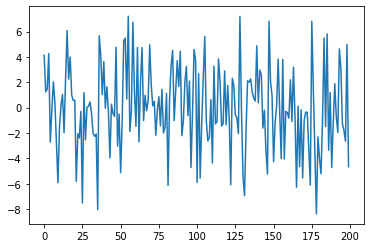

In [57]:
from matplotlib import pyplot as plt
plt.plot(model.resid)# artıkları görsellestirdik
# Gözlem değerlerini gidip incelemek gerekir.-8 ve 8 niye çıkmış.onlara
# gitmek gerekir

## Multi-Linear Regression- Çoklu Doğrusal Regresyon Modeli
* Temel amaç: Bağımlı ve bağımsız değişknler arasındaki ilişkyi ifade eden doğrusal fonksiyonu bulmaktır.
* Nasıl? Hata kareler toplamını minimize edecek şekilde katsayı tahminlerini bulmaya çalışmaktır.

#### Doğrusal Regresyonun Varsayımları
* Hatalar(gercek deger - tahmin edilen deger)  normal dağılır
* Hatalar birbirinden bağımsızdır ve aralarında otokorelasyon yoktur.
* Her bir gözlem için hata terimleri varyansları sabittir
* Değişkenler ile hata terimi arasında ilişki yoktur
* Bağımsız değişkenler arasında çoklu doğrusal ilişki problem yoktur.

#### Regresyon Modellerinin Avantaj ve Dezavantajları
* İyi anlaşılırsa diğer tüm ML ve DL konuları çok rahat kavranır.
* Doğrusallık nedensellik yorumları yapılabilmesini sağlar, bu durum aksiyoner ve stratejik modelleme imkanı verir.
* Değişkenlerin etki düzeyleri ve anlamlılıkları degerlendirilir.
* Bağımlı değişkendeki değişkenliğin açıklanma başarısı ölçülebilir.
* Model anlamlılıgı degerlendrilebilir
* - (negatif)  Varsayımları vardır.
* - (negatif) Aykırı gözlemlere duyarlıdır.

### Çoklu Doğrusal Regresyon - Model

In [1]:
import pandas as pd
ad=pd.read_csv("Advertising.csv",usecols=[1,2,3,4])
df=ad.copy()
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [2]:
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict

In [3]:
X= df.drop("sales",axis=1)# Sales değişkenini dışarda bırakıp 
# veri seti içindeki bağımsız değişkenleri seçme işlemi gerçekleştirdik
y=df["sales"]

# verisetinin test - train olarak ayrılması
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20,random_state=42)



In [14]:
X_train.head()
X_test.head()
y_test.head()
y_train.head()

79     11.0
197    12.8
38     10.1
24      9.7
122    11.6
Name: sales, dtype: float64

In [61]:
X_train.shape

(160, 3)

In [62]:
y_train.shape

(160,)

In [63]:
X_test.shape

(40, 3)

In [64]:
y_test.shape

(40,)

In [65]:
# training : veri setinin tüm hali
training=df.copy()

In [66]:
training.shape

(200, 4)

### Statsmodels ile model kurma 

In [67]:
import statsmodels.api as sm
lm=sm.OLS(y_train,X_train)
model=lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              2935.
Date:                Fri, 24 Apr 2020   Prob (F-statistic):                   1.28e-137
Time:                        13:38:14   Log-Likelihood:                         -336.65
No. Observations:                 160   AIC:                                      679.3
Df Residuals:                     157   BIC:                                      688.5
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0531      0.001     36.467      0.000       0.050       0.056
radio          0.2188      0.011     20.138      0.000       0.197       0.240
newspaper      0.0239      0.008      3.011      0.003       0.008       0.040
==============================================================================
Omnibus:                       11.405   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               15.574
Skew:                          -0.432   Prob(JB):                     0.000415
Kurtosis:                       4.261   Cond. No.                         13.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
TV,0.0531,0.001,36.467,0.000,0.050,0.056
radio,0.2188,0.011,20.138,0.000,0.197,0.240
newspaper,0.0239,0.008,3.011,0.003,0.008,0.040


In [69]:
# Modellerin tahmin başarılarını degerlendirmek için rse ,mse gibi
# degerlere bakıyor olucaz


### Scikit-learn ile model kurma

In [70]:
lm=LinearRegression()
model=lm.fit(X_train,y_train)

In [71]:
# sabit katsayı
model.intercept_

2.9790673381226274

In [72]:
# diğer tüm  bağımsız degişken katsayıları
model.coef_

array([0.04472952, 0.18919505, 0.00276111])

### Tahmin

Model denklemi: 
    Sales=2.97+TV*0.04+radio*0.18+newspaper*0.02
    
Örneğin ; 30 birim TV harcaması,10 birim radio harcaması ,40 birimde gazete
harcaması oldugunda satışların tahmini değeri ne olur?

In [73]:
yeni_veri=[[30],[10],[40]]
yeni_veri=pd.DataFrame(yeni_veri).T

In [74]:
model.predict(yeni_veri)

array([6.32334798])

In [75]:
rmse=np.sqrt(mean_squared_error(y_train,model.predict(X_train)))
rmse # eğitim hatamız

1.6447277656443369

In [76]:
# modelin daha önce hiç görmedikleri ile hata hesaplama 
rmse=np.sqrt(mean_squared_error(y_test,model.predict(X_test)))
rmse# test hatamız 

1.7815996615334502

### Model Tuning - Model Doğrulama

In [77]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [78]:
X= df.drop("sales",axis=1)# Sales değişkenini dışarda bırakıp 
# veri seti içindeki bağımsız değişkenleri seçme işlemi gerçekleştirdik
y=df["sales"]

# verisetinin test - train olarak ayrılması
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20,random_state=99)
lm= LinearRegression()
model=lm.fit(X_train,y_train)

In [79]:
np.sqrt(mean_squared_error(y_train,model.predict(X_train)))


1.723682482265075

In [80]:
model.score(X_train,y_train)# r2 degeri

0.8906288862925659

In [81]:
# Modelin belirli bir kısmını seçiceksin ama hangi belirli bir kısmını
# seçiceksin bu önemlidir.

In [82]:
cross_val_score(model,X,y,cv=10,scoring="r2")# 10 tane birbirinden farklı r2 degeri gelir
cross_val_score(model,X,y,cv=10,scoring="r2").mean()# valide edilmiş dogrulanmıs r2 degeri elimizde olur

0.8853562237979616

In [83]:
# Bunu bütün veri setine uygulayalım
# Bu valide edilmis scordur
cross_val_score(model,X_train,y_train,cv=10,scoring="r2").mean()# valide edilmiş dogrulanmıs r2 degeri elimizde olur

0.8548364931257494

In [84]:
# rmse degeri için bunu uygulayalım
np.sqrt(- cross_val_score(model,
                X_train,
                y_train,
                cv=10,
                scoring="neg_mean_squared_error")).mean()
# eğitim seti için 10 adet eğitim hatası olusturuldu
# ve bu eğitim hatalarının herbiris birbirinden farklı 
# bunların ortalamasını alıyoruz ve valide edilmiş eğitim hatası geliyor

1.7745451575988835

In [85]:
# model üzerindeki test hatası
np.sqrt(mean_squared_error(y_test,model.predict(X_test)))

1.4312783138301641

In [86]:
# valide edilmis test hatamız ne onu bulalım
np.sqrt(- cross_val_score(model,
                X_test,
                y_test,
                cv=10,
                scoring="neg_mean_squared_error")).mean()

1.475233977312039

## PCR- Temel Bileşen Regresyonu

In [87]:
# Değişkenlerin boyut indirgeme uygulandıktan sonra çıkan bileşenlere 
# regresyon modeli kurulması fikrine dayanır.

# Örn: değişkenler arasında yüksek korelasyon olması çoklu dogrusal bağlantı 
# problemine yol açıyor. Çoklu doğrusal bağlantı problemi olursa ne olur peki?
# ekk(en küçük kareler) yöntemiyle katsayılara ulaşma işlemi yapmıştık. Bu(Coklu dogrusal baglantı problemi) tahmincilerin
# yani katsayıların varyansını arttırmakta ve yanlılığa sebep olmaktadır.
# Bu sorunu ortadan kaldırmak için bazı alternatif çözümler ortaya çıkmaktadır.Bunlardan
# bir tanesi de PCR- Temel Bileşen Regresyonudur.

# PCA-Princiable Component Analysis : Elimizde p adet değişken oldugunda 
# bu p adet değiknenin(bağımsız değişken uzayı) içerdiği bilginin yüksek bir kısmını ondan
# daha az sayıda değişken ile bu bilginin maximumunu ifade etmektir.
# Bir miktar bilgi kaybını göz önünne alırız. İşte bu yaklaşıma 
#temel bileşen analizi denir.
    

 ## PCR Model

In [88]:
import pandas as pd
hit=pd.read_csv("original.csv")# American basketbol ligi 
hit.head()
df=hit.copy()
df.dropna()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
AtBat        322 non-null int64
Hits         322 non-null int64
HmRun        322 non-null int64
Runs         322 non-null int64
RBI          322 non-null int64
Walks        322 non-null int64
Years        322 non-null int64
CAtBat       322 non-null int64
CHits        322 non-null int64
CHmRun       322 non-null int64
CRuns        322 non-null int64
CRBI         322 non-null int64
CWalks       322 non-null int64
League       322 non-null object
Division     322 non-null object
PutOuts      322 non-null int64
Assists      322 non-null int64
Errors       322 non-null int64
Salary       263 non-null float64
NewLeague    322 non-null object
dtypes: float64(1), int64(16), object(3)
memory usage: 50.4+ KB


In [90]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,322.0,380.928571,153.404981,16.0,255.25,379.5,512.00,687.0
Hits,322.0,101.024845,46.454741,1.0,64.00,96.0,137.00,238.0
HmRun,322.0,10.770186,8.709037,0.0,4.00,8.0,16.00,40.0
Runs,322.0,50.909938,26.024095,0.0,30.25,48.0,69.00,130.0
RBI,322.0,48.027950,26.166895,0.0,28.00,44.0,64.75,121.0
Walks,322.0,38.742236,21.639327,0.0,22.00,35.0,53.00,105.0
Years,322.0,7.444099,4.926087,1.0,4.00,6.0,11.00,24.0
CAtBat,322.0,2648.683230,2324.205870,19.0,816.75,1928.0,3924.25,14053.0
CHits,322.0,717.571429,654.472627,4.0,209.00,508.0,1059.25,4256.0
CHmRun,322.0,69.490683,86.266061,0.0,14.00,37.5,90.00,548.0


In [91]:
# kategorik değişkenleri dummy değişkenine çevirme 
dms= pd.get_dummies(df[['League','Division','NewLeague']])
dms.head()
# kategorik değişkenler için one -hot encoding dönüşümü gerçekleştirmiş olduk.

# DİKKAT : Değişkenlerin tekrar ettiğini görüyoruz. O yüzden bunları atmamız gerekiyor.


,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
0,1,0,1,0,1,0
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1


In [92]:
y=df["Salary"]

In [93]:
# veriseti içeirisinden bağımlı değişkeni ve kategorik değikenleri çıkarttık
X_= df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X_.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
0,293.0,66.0,1.0,30.0,29.0,14.0,1.0,293.0,66.0,1.0,30.0,29.0,14.0,446.0,33.0,20.0
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0


In [166]:
# bagımsız değişkenleri modellemeye hazır hale getirdik
X=pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
0,293.0,66.0,1.0,30.0,29.0,14.0,1.0,293.0,66.0,1.0,30.0,29.0,14.0,446.0,33.0,20.0,0,0,0
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1


In [167]:
# veri setini test ve train olarak ayırdık
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,
                                              random_state=42)
print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)
training= df.copy()# tüm veri seti
print("training",training.shape)

X_train (241, 19)
y_train (241,)
X_test (81, 19)
y_test (81,)
training (322, 20)


In [168]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
# verinin ölçkelendirilmesi  ve bileşenlerinin oluşması
pca =PCA()# PCA nesnesi olusturuldu(değişken sayısı kadar bileşen olusturuldu)

In [169]:
# X_train üzerinden indirgeme işlemi gerçekleştirildi
X_reduced_train= pca.fit_transform(scale(X_train))# boyut indirgeyip model kurma işlemi yaptık

In [170]:
X_reduced_train[0:1,:]

array([[-2.73680193e+00,  4.13891463e-01, -1.73689593e+00,
         1.86014062e-02,  8.62012731e-01, -1.72123768e-01,
        -5.65952261e-04, -5.17260750e-01,  7.58202170e-02,
         1.81442115e-01,  2.95012457e-01,  7.75486328e-02,
         3.91773655e-01,  3.34510380e-01,  2.08431417e-02,
        -1.35344627e-01, -1.60542745e-02, -3.62273240e-02,
         1.53210951e-02]])

In [171]:
import numpy as np
# açıklanan varyansı grelim
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)[0:5]

array([38.78, 60.82, 71.55, 79.27, 84.54])

In [172]:
# Bileşen sayısı arttıkça variance ın açıklama oranı arttığı görülüyor.
# Burada 19 değişkeni  istersek 19 bileşenle ,istersek 10 istersek 5 bileşenle 
# temsil edebiliriz
# Bu bileşen sayısının üstüne model kurmak istediğimizde kurabiliriz

from sklearn.linear_model import LinearRegression
lm=LinearRegression()


In [173]:
y_train=y_train.fillna(y_train.mean())
pcr_model=lm.fit(X_reduced_train,y_train)


In [174]:
pcr_model.intercept_# sabit 

521.3072727272728

In [175]:
pcr_model.coef_# 19 katsayıda geldi

array([  81.38695042,   -3.48375144,   14.57577415,  -21.55040108,
        -50.25324479,   66.50784623,  -11.25756155,  -24.79561994,
         32.59298932,   87.94841448,  -48.90669161,   -8.16428632,
        100.23221165, -351.89067299,  -55.48281541,  415.18826632,
       -294.71336094, -504.32956714,  208.83181839])

## PCR Tahmin

In [176]:
y_pred= pcr_model.predict(X_reduced_train)
y_pred[0:10]

array([ 123.24991165,  604.30454275,  506.35286017,  423.92846255,
        253.20873697, 1041.42117392, 1727.18932034,  358.78844437,
        399.6305727 ,  539.89672865])

In [177]:
# train seti için hatanın hesaplanması
from sklearn.metrics import mean_squared_error,r2_score
np.sqrt(mean_squared_error(y_train,y_pred))


292.16571533917664

In [178]:
df["Salary"].mean()

535.9258821292775

In [179]:
r2_score(y_train,y_pred)

0.4615079439353803

In [180]:
# test hatasının hesaplanması
pca2=PCA()

In [181]:
X_reduced_test= pca2.fit_transform(scale(X_test))

In [182]:
#eğitim setiyle kurmus oldugum modeli test değerleri üzerinde 
# tahmin yapmasını sağladım
y_pred=pcr_model.predict(X_reduced_test)

In [183]:
y_test=y_test.fillna(y_test.mean())
np.sqrt(mean_squared_error(y_test,y_pred))

392.2511599975578

## PCR - Model Tuning

In [184]:
# bütün bilesenler ile kurulan modelin test hatasına bakalım
lm=LinearRegression()
pcr_model=lm.fit(X_reduced_train,y_train)
y_pred=pcr_model.predict(X_reduced_test)
print(np.sqrt(mean_squared_error(y_test,y_pred)))

392.2511599975578


In [185]:
# sadece birinci bileseni al diyoruz train setine
#tek bilesenli temel regresyon modeli kurma islemi gerceklestirdik
lm=LinearRegression()
pcr_model=lm.fit(X_reduced_train[:,0:1],y_train)
y_pred=pcr_model.predict(X_reduced_test[:,0:1])
print(np.sqrt(mean_squared_error(y_test,y_pred)))

356.91363777885095


In [186]:
# iki bilesenle bunu kuralım 
lm=LinearRegression()
pcr_model=lm.fit(X_reduced_train[:,0:2],y_train)
y_pred=pcr_model.predict(X_reduced_test[:,0:2])
print(np.sqrt(mean_squared_error(y_test,y_pred)))

355.3835934667481


In [187]:
from sklearn import model_selection

In [188]:
cv_10=model_selection.KFold(n_splits=10,shuffle=True,random_state=1)

In [189]:
lm=LinearRegression()

In [190]:
RMSE=[]

In [191]:
# HER BİR BİLESEN SAYISI İCİN K KATLI CROSS VALİDATİON UYGULAYIP
# HANGİ BİLESEN SAYISIININ EN AZ HATALI OLDUGUNU BİZE SÖYLEYECEK
for i in np.arange(1,X_reduced_train.shape[1]+1):
    score=np.sqrt(-1*model_selection.cross_val_score(lm,
                                                     X_reduced_train[:,:i],
                                                     y_train.ravel(),
                                                     cv=cv_10,
                                                    scoring="neg_mean_squared_error").mean())
    RMSE.append(score)

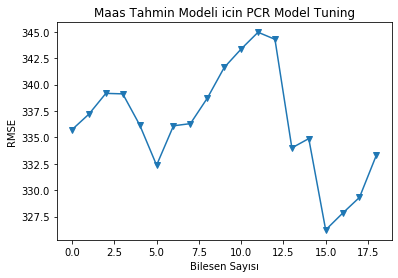

In [192]:
plt.plot(RMSE,'-v')
plt.xlabel("Bilesen Sayısı")
plt.ylabel("RMSE")
plt.title("Maas Tahmin Modeli icin PCR Model Tuning");

In [193]:
# cross validation üzerinden dogrulamayı train seti üzerinden gerceklesitrdik
# grafiktede görüldügü üzere rmse degeri en kucuk cıkan bilesen sayısı 15 dir.

In [194]:
# optimum bilesen sayımızla final modelini olusturmamız gerekiyor.

In [201]:
lm=LinearRegression()

In [202]:
pcr_model=lm.fit(X_reduced_train[:,0:15],y_train)

In [204]:
# egitim hatası 
y_pred=pcr_model.predict(X_reduced_train[:,0:15])
print(np.sqrt(mean_squared_error(y_train,y_pred)))

303.2708287956296


In [205]:
# test hatası 
y_pred=pcr_model.predict(X_reduced_test[:,0:15])
print(np.sqrt(mean_squared_error(y_test,y_pred)))

390.73244164300024


In [206]:
# modeli tune etmek demek model icin uygun olan hiperparametreleri 
# bulduk anlamına geliyor.

# PLS -Kısmi En Küçük Kareler Regresyonu
* Degiskenlerin daha az sayıda ve aralarında coklu dogrusal baglantı
problemi olmayan bilesenlere indirgenip regresyon modeli kurulması fikrine dayanır

In [207]:
# p adet degiskenin tasıdıgı bilgiyi ondan daha az sayıda c adet bilesenle ifade edilmesidir.

* Çok boyutluluk laneti p>n
* Çoklu dogrusal baglantı problemi
* PLS de PCR gibi bagımsız degiskenlerin dogrusal kombinasyonlarını bulur. Bu dogrusal kombinasyonlar bilesen yada latent degisken olarak adlandırılır.
* PLS NIPALS'in özel bir halidir,iteratif olarak bagımlı degisken ile yüksek korelasyona sahip degiskenler arasındaki gizli(latent) ilişkiyi bulmaya calısır.

## PCR vs PLS

* PCR' da dogrusal kombinasyonlar yani bilesenler bagımsız degisken uzagındaki degiskenligi maksimum sekilde özetleyecek sekilde olusturulur.
* Bu durum bagımlı degiskeni açıklama yetenegi olmamasına sebep olmakta 
* PLS' te ise bilesenler bagımlı degisken ile olan kovaryansı maksimum sekilde özetleyecek sekilde olusturulur.
* Degiskenler atılmak istenmiyorsa ve acıklanabilirlik aranıyorsa:PLS
* PLS,gözetimli boyut indirgeme prosedürü,PCR gözetimsiz boyut indirgeme prosedürü olarak görülebilir.
* İki yönteminde bir tuning paramteresi vardır oda bilesen sayısıdır.
* Optimum bilsene sayısını belirlemek icin CV yöntemi kullanılır


# PLS - MODEL

In [217]:

hit=pd.read_csv("original.csv")# American basketbol ligi 
df=hit.copy()
df=df.dropna()
dms= pd.get_dummies(df[['League','Division','NewLeague']])
y=df["Salary"]
X_= df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X=pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
# veri setini test ve train olarak ayırdık
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,
                                              random_state=42)
print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)
training= df.copy()# tüm veri seti
print("training",training.shape)

X_train (197, 19)
y_train (197,)
X_test (66, 19)
y_test (66,)
training (263, 20)


In [218]:
from sklearn.cross_decomposition import PLSRegression,PLSSVD

In [219]:
pls_model=PLSRegression().fit(X_train,y_train)

In [221]:
pls_model.coef_# modelin degisken sayısı kadar elimizde katsayı var 

array([[ 35.32916493],
       [ 48.83425857],
       [ 18.50240933],
       [ 39.28117603],
       [ 30.59952998],
       [ 40.03398345],
       [ 16.85990516],
       [ 28.22289896],
       [ 32.73784993],
       [ 22.00875744],
       [ 33.60903032],
       [ 30.39402522],
       [ 25.73279799],
       [ 54.98835148],
       [  6.56590871],
       [ -0.90894359],
       [ 17.60903423],
       [-37.24246339],
       [ 14.69680385]])

In [223]:
# bilesen sayısını degistirip tekrar calıstıralım
# 6 yazdıgımdada degisken sayısı kadar bilesen sayısı geldi
pls_model=PLSRegression(n_components=6).fit(X_train,y_train)

In [224]:
pls_model.coef_

array([[-108.74143193],
       [ 197.6386967 ],
       [  22.57338481],
       [  26.52768741],
       [ -25.67952167],
       [  54.16363009],
       [ -25.89997437],
       [   5.36637756],
       [  89.44665343],
       [  26.79039104],
       [ 102.43239418],
       [  68.82932424],
       [ -61.11470635],
       [  94.44121847],
       [  26.38215013],
       [ -45.01850138],
       [  77.17773908],
       [ -35.85447586],
       [ -45.66863853]])

In [225]:
# bu katsayıların dogrusal kombinasyonları olusturulup tahmin degerleri hesaplanıyor.

## PLS - TAHMİN

In [228]:
pls_model.predict(X_train)[0:10]#tahmin degerleri


array([[ 341.05563915],
       [ 818.68494511],
       [ 609.92707458],
       [ 125.15977454],
       [ 458.61602947],
       [1043.93221907],
       [ 172.32918764],
       [ 317.29628026],
       [ 518.8844206 ],
       [ 915.63364085]])

In [232]:
y_pred=pls_model.predict(X_train)

In [235]:
#eitim hatası
np.sqrt(mean_squared_error(y_train,y_pred))

298.01843205816147

In [236]:
r2_score(y_train,y_pred)

0.5512193616082299

In [237]:
# test hatası
y_pred=pls_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

370.20535521687447

## PLS - MODEL TUNİNG

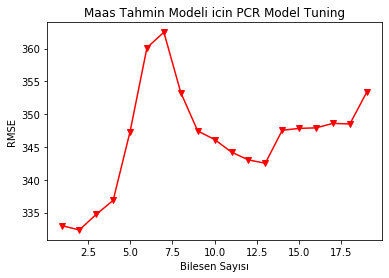

In [241]:
#CV
cv_10=model_selection.KFold(n_splits=10,shuffle=True,random_state=1)
#Hata Hesaplamak için Döngü
RMSE=[]
for i in np.arange(1,X_reduced_train.shape[1]+1):
    pls=PLSRegression(n_components=i)
    score=np.sqrt(-1*cross_val_score(pls,X_train,y_train,
                                                     cv=cv_10,
                                                    scoring="neg_mean_squared_error").mean())
    RMSE.append(score)
# Sonucların Görsellestirilmesi
plt.plot(np.arange(1,X_train.shape[1]+1),np.array(RMSE),'-v',c="r")
plt.xlabel("Bilesen Sayısı")
plt.ylabel("RMSE")
plt.title("Maas Tahmin Modeli icin PCR Model Tuning");

In [243]:
#optimum bilesen sayısını 2 olarak bulduk
pls_model=PLSRegression(n_components=2).fit(X_train,y_train)

In [244]:
y_pred=pls_model.predict(X_test)

In [245]:
np.sqrt(mean_squared_error(y_test,y_pred))

398.09956327448526

# Ridge Regresyon
* Amac: Hata kareler toplamını minimize eden katsayıları bu katsayılara bir ceza uygulayarak bulmaktır.

* Aşırı öğrenmeye karsı duyarlıdır.
* Yanlıdır fakat varyansı düşüktür.(Bazen yanlı modelleri daha cok tercih ederiz)
* cok fazla paramtere oldugunda EKK'ya göre daha iyidir.
* Çok boyutluluk lanetine karsı çözüm sunar.
* Çoklu dogrusal baglantı problemi oldugunda etkilidir.
* Tüm degiskenler ile model kurar.İlgisiz degiskenleri modelden çıkarmaz,katsayılarını sıfıra yaklastırır.
* LAMBDA kritik roldedir.İki terimin (formüldeki) göreceli etkilerini kontrol etmeyi saglar.
* llambda icin iyi bir deger bulunması önemlidir.Bunun icin CV yöntemi kullanılır.

In [246]:

hit=pd.read_csv("original.csv")# American basketbol ligi 
df=hit.copy()
df=df.dropna()
dms= pd.get_dummies(df[['League','Division','NewLeague']])
y=df["Salary"]
X_= df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X=pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
# veri setini test ve train olarak ayırdık
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,
                                              random_state=42)
print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)
training= df.copy()# tüm veri seti
print("training",training.shape)

X_train (197, 19)
y_train (197,)
X_test (66, 19)
y_test (66,)
training (263, 20)


In [247]:
from sklearn.linear_model import Ridge

In [248]:
ridge_model=Ridge(alpha=0.1).fit(X_train,y_train)

In [249]:
ridge_model

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [250]:
ridge_model.coef_

array([ -1.77435737,   8.80240528,   7.29595605,  -3.33257639,
        -2.08316481,   5.42531283,   7.58514945,  -0.13752764,
        -0.20779701,  -0.60361067,   1.7927957 ,   0.72866408,
        -0.68710375,   0.26153564,   0.26888652,  -0.52674278,
       112.14640272, -99.80997876, -48.07152768])

Text(0.5, 1.0, 'Düzenlilestirilmenin Bir Fonksiyonu Olarak Ridge Katsayıları')

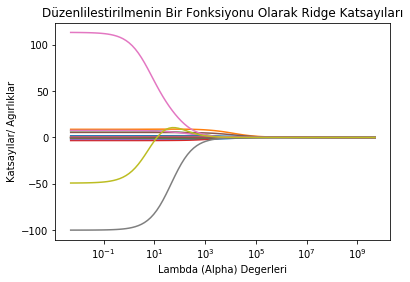

In [253]:
lambdalar=10**np.linspace(10,-2,100)*0.5
ridge_model=Ridge()
katsayilar=[]

for i in lambdalar:
    ridge_model.set_params(alpha=i)
    ridge_model.fit(X_train,y_train)
    katsayilar.append(ridge_model.coef_)
    
ax=plt.gca()
ax.plot(lambdalar,katsayilar)
ax.set_xscale('log')

plt.xlabel("Lambda (Alpha) Degerleri")
plt.ylabel("Katsayılar/ Agırlıklar")
plt.title("Düzenlilestirilmenin Bir Fonksiyonu Olarak Ridge Katsayıları")

In [254]:
# katsayılaır sıfıra yaklastırmıs

## Ridge Regresyon - TAHMİN

In [255]:
y_pred=ridge_model.predict(X_test)

In [256]:
np.sqrt(mean_squared_error(y_test,y_pred))

357.051792228284

In [257]:
r2_score(y_test,y_pred)

0.4110844905067622

## Ridge Regresyon - MODEL TUNİNG

In [258]:
# Hedefimiz optimum lambda degrlerine erismek

In [259]:
lambdalar=10**np.linspace(10,-2,100)*0.5

In [261]:
from sklearn.linear_model import RidgeCV
ridge_cv=RidgeCV(alphas=lambdalar,scoring="neg_mean_squared_error",normalize=True)

In [262]:
ridge_cv.fit(X_train,y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=True,
        scoring='neg_mean_squared_error', store_cv_values=False)

In [263]:
ridge_cv.alpha_# optimum lambda degeri

0.7599555414764666

In [264]:
ridge_tuned=Ridge(alpha=ridge_cv.alpha_,
                 normalize=True).fit(X_train,y_train)

In [265]:
y_pred=ridge_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

386.6826429756415

# Lasso Regresyon

* Amaç: Hata kareler toplamını minimize den katsayıları bu katsayılara bir ceza uygulayarak bulmaktır.

In [266]:
# burada katsayıların cezalarını 0 yaparak uyugulama yapılmaktadır.

* Ridge regresyonun ilgili-ilgisiz tüm degiskenleri modelde bırakma dezavantajını gidermek için önerilmiştir.
* Lasso'da katsayıları sıfıra yaklastırır.
* Fakat L1 normu lambda yeteri kadar büyük oldugunda bazı katsayıları sıfır yapar.Böylece degisken secimi yapmıs olur.
* Lambda'nın doğru seçilmesi çok önemlidir,burada da CV kullanılır.
* Ridge ve Lasso yöntemleri birbirindden üstün degildir.

* Lambda Ayar Parametresinin Belirlenmesi
    - Lambdanın sıfır oldugu yer EKK'dir.(SSE)-HATA KARELER TOPLAMI - HKT'yi minimum yapan lambdaları arıyoruz.
    - Lambda için belirli degerleri içeren bir küme secilir  ve her birisi icin cross validation test hatası hesaplanır.
    - En küçük cross validation'ı veren lambda ayar parametresi olarak secilir
    - Son olarak seçilen bu lambda ile model yeniden tüm gözlemlere fit edilir.

# Lasso Regresyon - MODEL

In [267]:
hit=pd.read_csv("original.csv")# American basketbol ligi 
df=hit.copy()
df=df.dropna()
dms= pd.get_dummies(df[['League','Division','NewLeague']])
y=df["Salary"]
X_= df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X=pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
# veri setini test ve train olarak ayırdık
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,
                                              random_state=42)
print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)
training= df.copy()# tüm veri seti
print("training",training.shape)

X_train (197, 19)
y_train (197,)
X_test (66, 19)
y_test (66,)
training (263, 20)


In [268]:
from sklearn.linear_model import Lasso
lasso_model=Lasso(alpha=0.1).fit(X_train,y_train)

C:\Users\aayse\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8249174.751388057, tolerance: 3898.6869563806586
  positive)


In [269]:
lasso_model.coef_

array([-1.72206506e+00,  8.56210197e+00,  6.91175137e+00, -3.13240128e+00,
       -2.00771676e+00,  5.36159035e+00,  8.86871593e+00, -1.69520371e-01,
       -5.58121413e-02, -3.53962588e-01,  1.70961000e+00,  6.40603469e-01,
       -6.58519895e-01,  2.60093222e-01,  2.78717030e-01, -5.92690965e-01,
        1.12659630e+02, -9.99652090e+01, -4.81289395e+01])

C:\Users\aayse\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5469.55874145031, tolerance: 3898.6869563806586
  positive)
C:\Users\aayse\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6540.1476798169315, tolerance: 3898.6869563806586
  positive)
C:\Users\aayse\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4001.756137404591, tolerance: 3898.6869563806586
  positive)
C:\Users\aayse\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarn

Text(0.5, 1.0, 'weights')

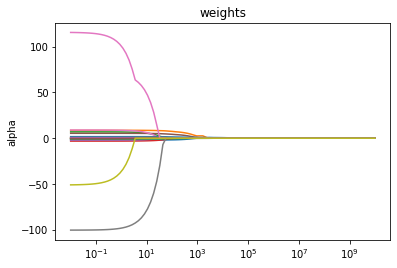

In [270]:
lasso=Lasso()
lambdalar=10**np.linspace(10,-2,100)*0.5
katsayilar=[]

for i in lambdalar:
    lasso.set_params(alpha=i)
    lasso.fit(X_train,y_train)
    katsayilar.append(lasso.coef_)
    
ax=plt.gca()
ax.plot(lambdalar*2,katsayilar)
ax.set_xscale('log')

plt.axis("tight")
plt.ylabel("alpha")
plt.title("weights")

# Lasso Regresyon - TAHMİN

In [271]:
lasso_model.predict(X_test)

array([ 613.88833029,  701.97056731, 1005.55539526,  414.08312603,
        399.18417127,  344.71444139,  664.86990217,  451.60757   ,
        914.64492066,  644.67006406,  691.60613554,  884.71702368,
        210.04523766,  446.12527252,  262.94922087,  499.22332142,
        805.2275034 ,   43.49230343, 1250.49322312,  316.34470193,
        422.96656686,  743.29944548,  572.90774248,  655.15609074,
        618.96407069,  200.75845796,  882.64622066,  254.06366112,
        430.25494812,   84.17391461,  143.60312305,  130.61554   ,
        363.74498233,  461.7321162 ,  273.42345417,  244.49816262,
       1324.62748553,  107.89909718,  135.63065031,  242.72630885,
         51.70024086,  297.57598929,  586.86143037,  398.85227639,
        763.99543074,  690.10003532,  344.06272851,  247.43966241,
        255.13234043,  662.89091837,  765.66189   ,  313.57347726,
        765.84996179,  189.77235179,  283.98765436,  589.95238974,
        663.31166365,  803.29524626,  164.99767232, 1170.24294

In [272]:
y_pred=lasso_model.predict(X_test)

In [273]:
np.sqrt(mean_squared_error(y_test,y_pred))

356.75452701487706

# Lasso Regresyon - MODEL TUNİNG

In [274]:
from sklearn.linear_model import LassoCV

In [275]:
lasso_cv_model=LassoCV(alphas=None,cv=10,max_iter=10000,normalize=True)

In [276]:
lasso_cv_model.fit(X_train,y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=10000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [277]:
lasso_cv_model.alpha_

0.39406126432470073

In [278]:
lasso_tuned=Lasso(alpha=lasso_cv_model.alpha_)

In [279]:
lasso_tuned.fit(X_train,y_train)

C:\Users\aayse\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8252823.943524013, tolerance: 3898.6869563806586
  positive)


Lasso(alpha=0.39406126432470073, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [280]:
y_pred=lasso_tuned.predict(X_test)

In [281]:
np.sqrt(mean_squared_error(y_test,y_pred))

356.5226376958365

# ElasticNet Regresyonu
* Amac: Hata kareler toplamını minimize eden katsayıları bu katsayılara bir ceza uygulayarak bulmaktır.Elasticnet L1 ve L2 yaklaşımını birleştirir.

In [282]:
# hem cezalandırma hemde degisken secme islemini gerceklestirir.

# ElasticNet Regresyonu - MODEL

In [283]:
hit=pd.read_csv("original.csv")# American basketbol ligi 
df=hit.copy()
df=df.dropna()
dms= pd.get_dummies(df[['League','Division','NewLeague']])
y=df["Salary"]
X_= df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X=pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
# veri setini test ve train olarak ayırdık
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,
                                              random_state=42)
print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)
training= df.copy()# tüm veri seti
print("training",training.shape)

X_train (197, 19)
y_train (197,)
X_test (66, 19)
y_test (66,)
training (263, 20)


In [284]:
from sklearn.linear_model import ElasticNet

In [285]:
enet_model=ElasticNet()

In [286]:
enet_model.fit(X_train,y_train)

C:\Users\aayse\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8487984.79936731, tolerance: 3898.6869563806586
  positive)


ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [287]:
enet_model.coef_


array([ -1.86256172,   8.70489065,   5.10426375,  -2.89875799,
        -1.28642985,   5.24343682,   6.04480276,  -0.14701495,
        -0.21566628,  -0.7897201 ,   1.80813117,   0.80914508,
        -0.61262382,   0.26816203,   0.27172387,  -0.36530729,
        19.2186222 , -31.16586592,   8.98369938])

In [288]:
enet_model.intercept_

-6.465955602111876

# ElasticNet Regresyonu - TAHMİN

In [289]:
enet_model

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [291]:
y_pred=enet_model.predict(X_test)

In [292]:
np.sqrt(mean_squared_error(y_test,y_pred))

357.1676548181244

In [293]:
r2_score(y_test,y_pred)#acıklanabilirlik oranı

0.41070222469326934

# ElasticNet - MODEL TUNİNG

In [294]:
from sklearn.linear_model import ElasticNetCV

In [296]:
enet_cv_model=ElasticNetCV(cv=10,random_state=0).fit(X_train,y_train)

In [297]:
enet_cv_model.alpha_

5230.7647364798695

In [299]:
enet_tuned=ElasticNet(alpha=enet_cv_model.alpha_).fit(X_train,y_train)

In [300]:
y_pred=enet_tuned.predict(X_test)

In [301]:
np.sqrt(mean_squared_error(y_test,y_pred))

394.15280563218795

In [ ]:
# Elimzideki bu veri seti için en iyi calısan modelin lasso regresyon ile kurulan model oldugu ortaya cıkmıstır.
# cünkü test hatası en az onun çıkmıstır.